<a href="https://colab.research.google.com/github/sudo-KingJahad/midterm-machine-learning/blob/main/midterm_transaction_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q gdown

# kalian download semua file dari gdrive dibawah lalu buat folder (ex. midterm_folder)
!gdown --folder 1JvI5xhPfN3VmjpWYZk9fCHG41xG697um -O midterm_folder

Retrieving folder contents
Processing file 1ALveidCmKzk4p_liQ7b663BXL0PcTaFN test_transaction.csv
Processing file 1Ujh37a1kTarNf3dSOSrj-hKDswULebYA train_transaction.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN
From (redirected): https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN&confirm=t&uuid=da39ccb4-029b-4a4b-b966-39de5df0afdb
To: /content/midterm_folder/test_transaction.csv
100% 613M/613M [00:10<00:00, 59.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Ujh37a1kTarNf3dSOSrj-hKDswULebYA
From (redirected): https://drive.google.com/uc?id=1Ujh37a1kTarNf3dSOSrj-hKDswULebYA&confirm=t&uuid=34a3d094-92bd-46b5-9f85-a9ce11099760
To: /content/midterm_folder/train_transaction.csv
100% 683M/683M [00:10<00:00, 63.4MB/s]
Download completed


In [2]:
from google.colab import drive
drive.mount('/content/drive')
BASE_PATH = "/content/drive/MyDrive/midterm_folder"  # sesuaikan jika perlu

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import a as pl

BASE_PATH = "midterm_folder"

train_transaction = pl.read_csv(f"{BASE_PATH}/train_transaction.csv")
test_transaction  = pl.read_csv(f"{BASE_PATH}/test_transaction.csv")

print(train_transaction.shape) #590540 row dan 393 feature + 1 target
print(test_transaction.shape) #506691 row dan 393 feature

(590540, 394)
(506691, 393)


In [ ]:
train_transaction.head() #isFraud adalah target featurenya

TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,…,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
i64,i64,i64,f64,str,i64,f64,f64,str,f64,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2987000,0,86400,68.5,"""W""",13926,null,150.0,"""discover""",142.0,"""credit""",315.0,87.0,19.0,null,null,null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,null,13.0,null,null,null,…,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987001,0,86401,29.0,"""W""",2755,404.0,150.0,"""mastercard""",102.0,"""credit""",325.0,87.0,null,null,"""gmail.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,null,null,0.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987002,0,86469,59.0,"""W""",4663,490.0,150.0,"""visa""",166.0,"""debit""",330.0,87.0,287.0,null,"""outlook.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,null,null,0.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987003,0,86499,50.0,"""W""",18132,567.0,150.0,"""mastercard""",117.0,"""debit""",476.0,87.0,null,null,"""yahoo.com""",null,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,null,…,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987004,0,86506,50.0,"""H""",4497,514.0,150.0,"""mastercard""",102.0,"""credit""",420.0,87.0,null,null,"""gmail.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,null,null,null,null,null,…,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_transaction.head() #uji data baru, setelah pembuatan model machine learningnya

TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,…,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
i64,i64,f64,str,i64,f64,f64,str,f64,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
3663549,18403224,31.95,"""W""",10409,111.0,150.0,"""visa""",226.0,"""debit""",170.0,87.0,1.0,null,"""gmail.com""",null,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,null,null,…,0.0,0.0,1.0,0.0,47.950001,0.0,0.0,47.950001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663550,18403263,49.0,"""W""",4272,111.0,150.0,"""visa""",226.0,"""debit""",299.0,87.0,4.0,null,"""aol.com""",null,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,null,null,…,0.0,0.0,1.0,0.0,280.0,77.0,0.0,280.0,0.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663551,18403310,171.0,"""W""",4476,574.0,150.0,"""visa""",226.0,"""debit""",472.0,87.0,2635.0,null,"""hotmail.com""",null,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,null,null,…,0.0,0.0,1.0,0.0,1321.0,0.0,0.0,1058.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663552,18403310,284.95,"""W""",10989,360.0,150.0,"""visa""",166.0,"""debit""",205.0,87.0,17.0,null,"""gmail.com""",null,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663553,18403317,67.95,"""W""",18018,452.0,150.0,"""mastercard""",117.0,"""debit""",264.0,87.0,6.0,null,"""gmail.com""",null,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,null,null,…,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


In [3]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from lightgbm import LGBMClassifier

import joblib  # untuk menyimpan model

In [4]:
# load CSV (pastikan file ada di folder)
train = pd.read_csv(f"{BASE_PATH}/train_transaction.csv")

test = pd.read_csv(f"{BASE_PATH}/test_transaction.csv")

print("Train shape:", train.shape)
print("Test  shape:", test.shape)

Train shape: (590540, 394)
Test  shape: (506691, 393)


isFraud in columns? True
isFraud
0    569877
1     20663
Name: count, dtype: int64
Fraud rate: 0.03499000914417313


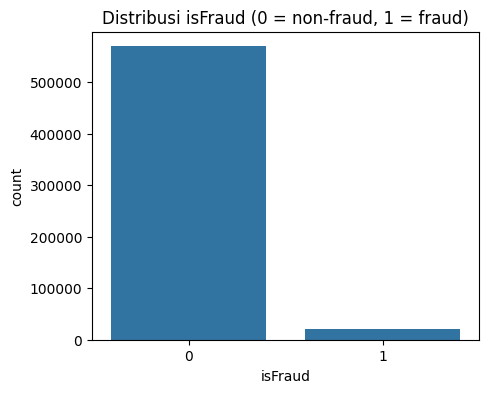

In [5]:
  # cek kolom target ada
print("isFraud in columns?", 'isFraud' in train.columns)

# distribusi label
print(train['isFraud'].value_counts())
print("Fraud rate:", train['isFraud'].mean())

# bar plot sederhana
plt.figure(figsize=(5,4))
sns.countplot(x='isFraud', data=train)
plt.title("Distribusi isFraud (0 = non-fraud, 1 = fraud)")
plt.show()

In [6]:
y = train['isFraud']
X = train.drop(['isFraud'], axis=1)

# (opsional) pakai subset cepat untuk debug:
# X_small, _, y_small, _ = train_test_split(X, y, train_size=0.2, stratify=y, random_state=42)
# gunakan X_small, y_small saat coba-coba, lalu ganti ke X,y untuk training final

In [7]:
# Untuk kecepatan dan kesederhanaan: isi kategori dengan 'missing', numeric dengan median
obj_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# kategori
for c in obj_cols:
    X[c] = X[c].fillna('missing').astype(str)
    test[c] = test[c].fillna('missing').astype(str)

# numerik
for c in num_cols:
    med = X[c].median()
    X[c] = X[c].fillna(med)
    test[c] = test[c].fillna(med)

In [8]:
for c in obj_cols:
    # gabungkan train+test untuk memastikan mapping konsisten
    combined = pd.concat([X[c], test[c]], axis=0).astype('category')
    X[c] = combined[:len(X)].cat.codes.values
    test[c] = combined[len(X):].cat.codes.values

In [9]:
if 'TransactionAmt' in X.columns:
    X['TransactionAmt_log'] = np.log1p(X['TransactionAmt'])
    test['TransactionAmt_log'] = np.log1p(test['TransactionAmt'])

/tmp/ipython-input-3708784083.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['TransactionAmt_log'] = np.log1p(X['TransactionAmt'])
/tmp/ipython-input-3708784083.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['TransactionAmt_log'] = np.log1p(test['TransactionAmt'])


In [10]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(X_train.shape, X_val.shape)

(472432, 394) (118108, 394)


In [11]:
baseline = LGBMClassifier(
    objective='binary',
    learning_rate=0.05,
    n_estimators=400,
    num_leaves=64,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

baseline.fit(X_train, y_train)
val_proba_baseline = baseline.predict_proba(X_val)[:,1]
print("Baseline ROC-AUC:", roc_auc_score(y_val, val_proba_baseline))

[LightGBM] [Info] Number of positive: 16530, number of negative: 455902
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.362209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37009
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 392
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Baseline ROC-AUC: 0.9566645397200253


In [12]:
baseline = LGBMClassifier(
    objective='binary',
    learning_rate=0.05,
    n_estimators=400,
    num_leaves=64,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

baseline.fit(X_train, y_train)
val_proba_baseline = baseline.predict_proba(X_val)[:,1]
print("Baseline ROC-AUC:", roc_auc_score(y_val, val_proba_baseline))

[LightGBM] [Info] Number of positive: 16530, number of negative: 455902
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.391595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37009
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 392
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Baseline ROC-AUC: 0.9566645397200253


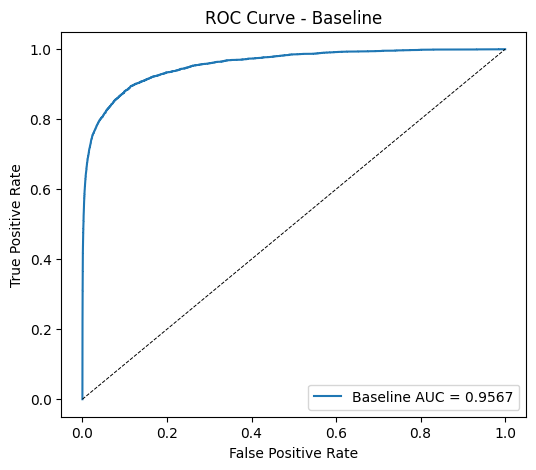

In [13]:
fpr, tpr, _ = roc_curve(y_val, val_proba_baseline)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Baseline AUC = {roc_auc:.4f}')
plt.plot([0,1],[0,1],'k--', linewidth=0.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Baseline')
plt.legend(loc='lower right')
plt.show()

In [14]:
param_grid = {
    'num_leaves': [31, 64],
    'n_estimators': [200]   # tetap kecil supaya cepat
}

grid = GridSearchCV(
    estimator=LGBMClassifier(objective='binary', learning_rate=0.05, class_weight='balanced', random_state=42, n_jobs=-1),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=2,
    verbose=1
)

grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV AUC:", grid.best_score_)
best = grid.best_estimator_

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[LightGBM] [Info] Number of positive: 8265, number of negative: 227951
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.671375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37042
[LightGBM] [Info] Number of data points in the train set: 236216, number of used features: 391
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 8265, number of negative: 227951
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.264496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37004
[LightGBM] [Info] Number of data points in the tra

In [15]:
val_proba_best = best.predict_proba(X_val)[:,1]
print("Tuned ROC-AUC:", roc_auc_score(y_val, val_proba_best))

# classification report dengan threshold 0.5
y_pred = (val_proba_best > 0.5).astype(int)
print(classification_report(y_val, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))


Tuned ROC-AUC: 0.946152750503958
              precision    recall  f1-score   support

           0       0.99      0.91      0.95    113975
           1       0.25      0.83      0.39      4133

    accuracy                           0.91    118108
   macro avg       0.62      0.87      0.67    118108
weighted avg       0.97      0.91      0.93    118108

Confusion matrix:
 [[103886  10089]
 [   682   3451]]


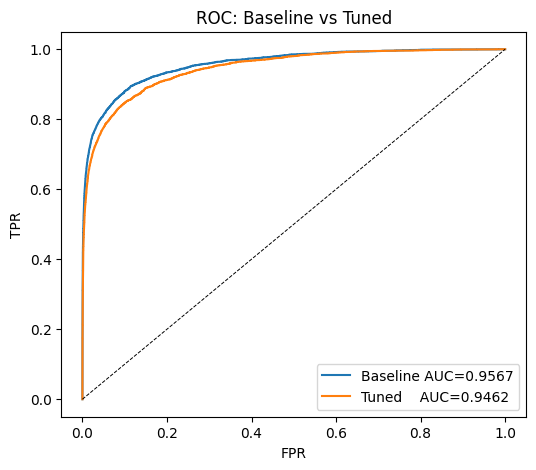

In [16]:
fpr_b, tpr_b, _ = roc_curve(y_val, val_proba_baseline)
fpr_t, tpr_t, _ = roc_curve(y_val, val_proba_best)

plt.figure(figsize=(6,5))
plt.plot(fpr_b, tpr_b, label=f'Baseline AUC={auc(fpr_b,tpr_b):.4f}')
plt.plot(fpr_t, tpr_t, label=f'Tuned    AUC={auc(fpr_t,tpr_t):.4f}')
plt.plot([0,1],[0,1],'k--', linewidth=0.7)
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC: Baseline vs Tuned')
plt.legend(loc='lower right')
plt.show()

In [17]:
final_model = best
final_model.fit(X, y)  # latih pada seluruh train (lebih baik sebelum prediksi test)
joblib.dump(final_model, f"{BASE_PATH}/lgbm_final_model.pkl")
print("Final model saved.")

[LightGBM] [Info] Number of positive: 20663, number of negative: 569877
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.152120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37200
[LightGBM] [Info] Number of data points in the train set: 590540, number of used features: 392
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Final model saved.


In [ ]:
# Pastikan kolom test sesuai X columns
test_for_pred = test[X.columns].copy()
test_proba = final_model.predict_proba(test_for_pred)[:,1]

submission = pd.DataFrame({
    'TransactionID': test['TransactionID'],
    'isFraud': test_proba
})
submission.to_csv(f"{BASE_PATH}/submission.csv", index=False)
print("Saved submission to:", f"{BASE_PATH}/submission.csv")